In [135]:
import mne
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats, signal
import itertools
import pandas as pd
from datetime import datetime
import os
from visbrain.io.rw_hypno import read_hypno
import yasa
from lspopt import spectrogram_lspopt
from matplotlib.colors import Normalize
plt.style.use('dark_background')

In [114]:
# preprocess
sr = 250
raw = mne.io.read_raw_edf('C:\\Lilach\\402_for_tag_filtered_fix_tag.edf').pick_channels(['RAH1']).resample(sr)
spikes = raw.annotations
spikes_df = pd.DataFrame(spikes)
# end_onset = list(spikes_df[spikes_df['description'].str.contains('END')]['onset'])[0]
# raw.crop(tmin=96, tmax=98).resample(sf)
# signal_data = raw.copy().pick_channels(['RAH1']).get_data()[0]

# make raw object into epochs (2 sec)
dummy_events = mne.make_fixed_length_events(raw, id=1, duration=2)
epochs = mne.Epochs(raw, events=dummy_events, tmin=0, tmax=2, baseline=(0, 0), on_missing='ignore')

Extracting EDF parameters from C:\Lilach\402_for_tag_filtered_fix_tag.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 1 events and 2001 original time points ...


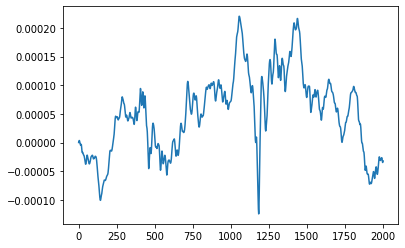

In [18]:
# epochs.get_data().shape
# plt.plot(epochs[21].get_data()[0])
plt.plot()

In [20]:
spikes_df

,onset,duration,description,orig_time
0,41.1777,0.0,Rt spike,2007-09-23 23:30:00+00:00
1,61.0798,0.0,Lt spike,2007-09-23 23:30:00+00:00
2,61.1191,0.0,Lt spike,2007-09-23 23:30:00+00:00
3,61.8968,0.0,Rt spike,2007-09-23 23:30:00+00:00
4,97.2500,0.0,Rt spike,2007-09-23 23:30:00+00:00
5,121.3000,0.0,Lt spike,2007-09-23 23:30:00+00:00
6,121.4411,0.0,Rt spike,2007-09-23 23:30:00+00:00
7,129.6388,0.0,Lt spike,2007-09-23 23:30:00+00:00
8,138.5000,0.0,Rt spike,2007-09-23 23:30:00+00:00
9,140.3000,0.0,Rt spike,2007-09-23 23:30:00+00:00


Loading data for 1 events and 501 original time points ...
0 bad epochs dropped


c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


(0.124, 1.86, 4.032258064516129, 36.29032258064516)

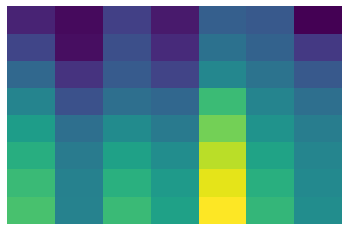

In [60]:
f, t, Sxx = spectrogram_lspopt(epochs[20].get_data()[0][0], sr, nperseg=int(0.25 * sr), noverlap=0)
Sxx = 10 * np.log10(Sxx)
good_freqs = np.logical_and(f >= 0.1, f <= 40)
Sxx = Sxx[good_freqs, :]
f = f[good_freqs]
plt.pcolormesh(t, f, Sxx)
plt.axis('off')

In [70]:
def format_img(edf, channel):
    epochs, epochs_random = [], []
    window_size = 2
    raw = mne.io.read_raw_edf(edf).pick_channels([channel]).resample(sr)
    spikes = raw.annotations
    spikes_df = pd.DataFrame(spikes)
    end_onset = list(spikes_df[spikes_df['description'].str.contains('END')]['onset'])[0]
    spikes_df = spikes_df[spikes_df['description'].str.contains(channel[0] + 't')]
    spikes_df = spikes_df.drop_duplicates(subset=['onset'])
    complete_spikes_df = spikes_df[spikes_df['onset'] < end_onset]

    # make raw object into epochs (2 sec)
    dummy_events = mne.make_fixed_length_events(raw, id=1, duration=window_size)
    raw_all_epochs = mne.Epochs(raw, events=dummy_events, tmin=0, tmax=window_size, baseline=(0, 0), on_missing='ignore')

    # from first tags round- only some spikes here and there
    random_spikes_df = spikes_df[spikes_df['onset'] > end_onset]
    # raw_data = raw.copy().pick_channels([channel]).resample(sr).get_data()[0]
    for onset in random_spikes_df['onset']:
        epochs_random.append(raw_all_epochs[int(onset / 2)].get_data()[0][0])
    y_windows_random = np.full(len(epochs_random), 1)

    # from second tags round- complete data
    raw_complete = raw.crop(tmax=end_onset)
    raw_complete_epochs = mne.Epochs(raw_complete, events=dummy_events, tmin=0, tmax=window_size, baseline=(0, 0), on_missing='ignore', preload=True)

    for curr in raw_complete_epochs:
        epochs.append(curr[0])

    y_windows = np.zeros(len(raw_complete_epochs))
    for onset in complete_spikes_df['onset']:
        y_windows[int(onset / 2)] = 1

    final_epochs = np.concatenate((epochs, epochs_random))
    # for some reason the first column is all zero
    final_epochs = np.delete(final_epochs, 0, 1)
    y_windows = np.concatenate((y_windows, y_windows_random))

    return final_epochs, y_windows

In [69]:
edf = 'C:\\Lilach\\402_for_tag_filtered_fix_tag.edf'
channel = 'RAH1'
epochs, epochs_random = [], []
window_size = 2
raw = mne.io.read_raw_edf(edf).pick_channels([channel]).resample(sr)
spikes = raw.annotations
spikes_df = pd.DataFrame(spikes)
end_onset = list(spikes_df[spikes_df['description'].str.contains('END')]['onset'])[0]
spikes_df = spikes_df[spikes_df['description'].str.contains(channel[0] + 't')]
spikes_df = spikes_df.drop_duplicates(subset=['onset'])
complete_spikes_df = spikes_df[spikes_df['onset'] < end_onset]

# make raw object into epochs (2 sec)
dummy_events = mne.make_fixed_length_events(raw, id=1, duration=window_size)
raw_all_epochs = mne.Epochs(raw, events=dummy_events, tmin=0, tmax=window_size, baseline=(0, 0), on_missing='ignore')

# from first tags round- only some spikes here and there
random_spikes_df = spikes_df[spikes_df['onset'] > end_onset]
# raw_data = raw.copy().pick_channels([channel]).resample(sr).get_data()[0]
for onset in random_spikes_df['onset']:
    epochs_random.append(raw_all_epochs[int(onset / 2)].get_data()[0][0])
y_windows_random = np.full(len(epochs_random), 1)

# from second tags round- complete data
raw_complete = raw.crop(tmax=end_onset)
raw_complete_epochs = mne.Epochs(raw_complete, events=dummy_events, tmin=0, tmax=window_size, baseline=(0, 0), on_missing='ignore', preload=True)

for curr in raw_complete_epochs:
    epochs.append(curr[0])

y_windows = np.zeros(len(raw_complete_epochs))
for onset in complete_spikes_df['onset']:
    y_windows[int(onset / 2)] = 1

epochs = np.concatenate((epochs, epochs_random))
y_windows = np.concatenate((y_windows, y_windows_random))

Extracting EDF parameters from C:\Lilach\402_for_tag_filtered_fix_tag.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 

KeyboardInterrupt: 

In [71]:
x, y = format_img('C:\\Lilach\\402_for_tag_filtered_fix_tag.edf', 'RAH1')

Extracting EDF parameters from C:\Lilach\402_for_tag_filtered_fix_tag.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Loading data for 1 events and 501 original time points ...
0 

TypeError: Invalid shape (500,) for image data

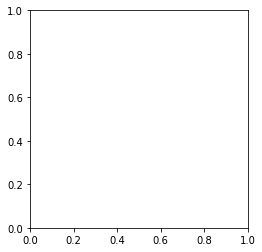

In [91]:
plt.imshow(x[20])

c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_lau

<Figure size 432x288 with 0 Axes>

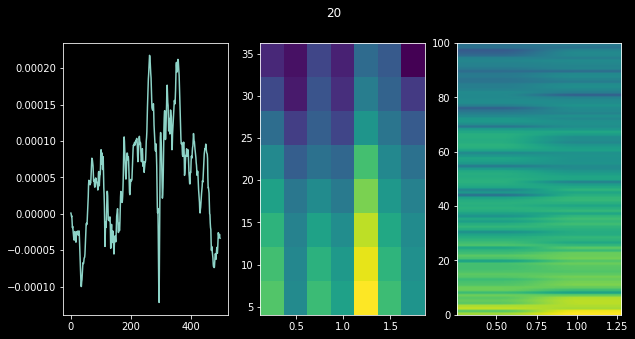

<Figure size 432x288 with 0 Axes>

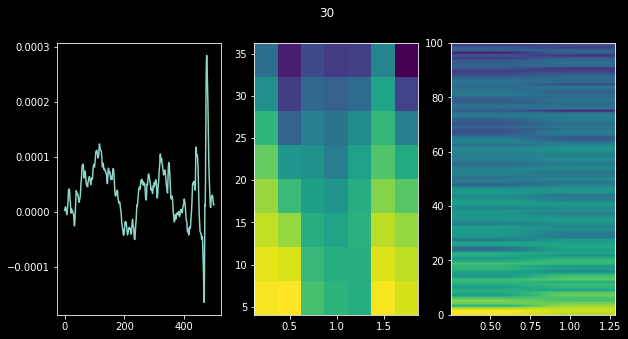

<Figure size 432x288 with 0 Axes>

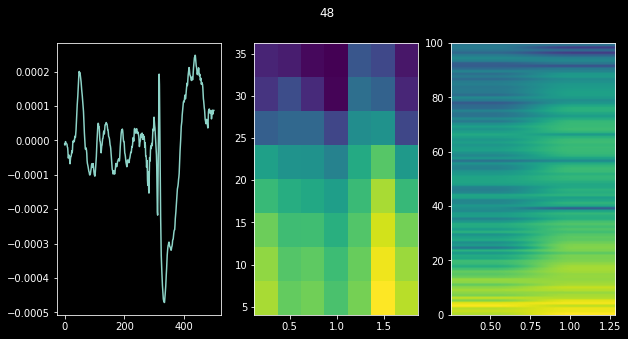

<Figure size 432x288 with 0 Axes>

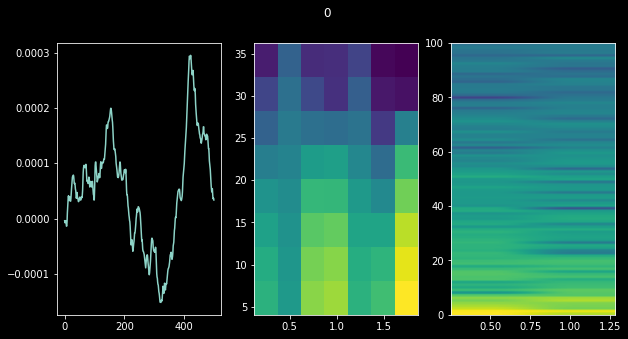

<Figure size 432x288 with 0 Axes>

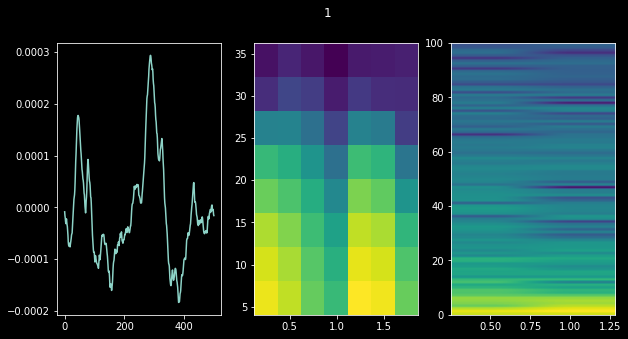

<Figure size 432x288 with 0 Axes>

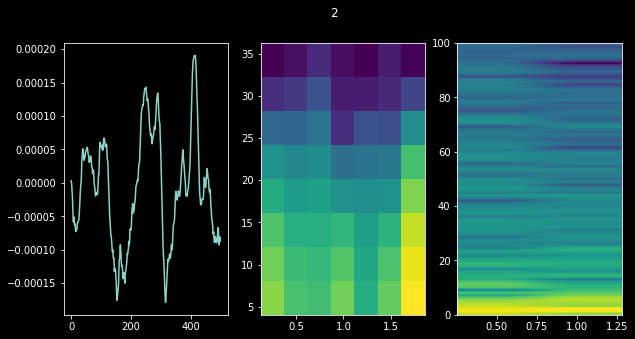

In [145]:
indexes = [20, 30, 48] + list(range(3))
for i in indexes:
    f, t, Sxx = spectrogram_lspopt(x[i], sr, nperseg=int(0.25 * sr), noverlap=0)
    Sxx = 10 * np.log10(Sxx)
    good_freqs = np.logical_and(f >= 0.1, f <= 40)
    Sxx = Sxx[good_freqs, :]
    f = f[good_freqs]
    plt.figure()
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[1].pcolormesh(t, f, Sxx)
    axes[0].plot(x[i])
    axes[2].specgram(x[i],Fs=sr)
    axes[2].set_ylim([0, 100])
    fig.suptitle(i)

    # plt.axis('off')

Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Figure size 432x288 with 0 Axes>

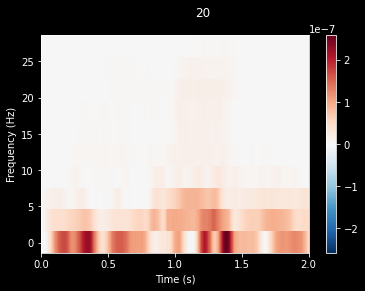

Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Figure size 432x288 with 0 Axes>

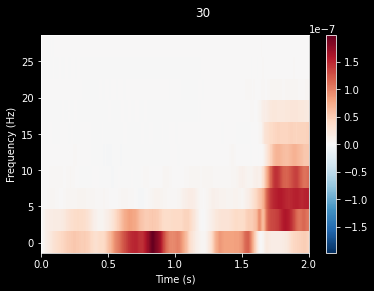

Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Figure size 432x288 with 0 Axes>

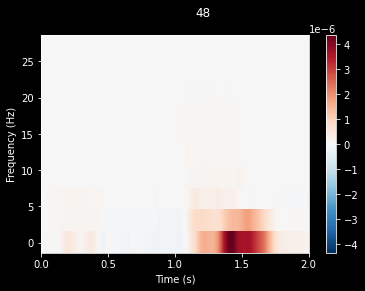

Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Figure size 432x288 with 0 Axes>

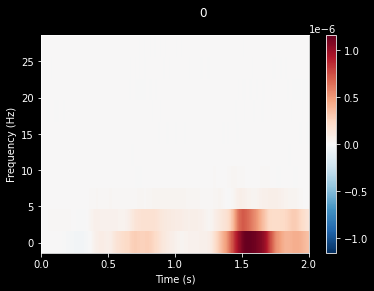

Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Figure size 432x288 with 0 Axes>

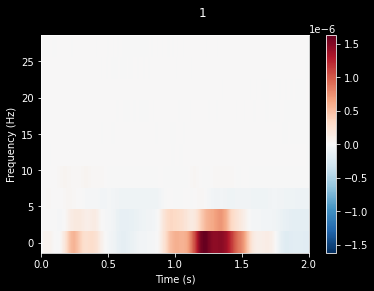

Loading data for 1 events and 501 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


<Figure size 432x288 with 0 Axes>

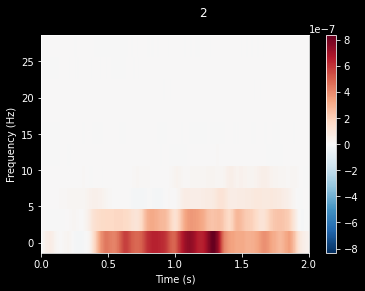

In [156]:
from mne.time_frequency import tfr_multitaper, psd_multitaper, psd_welch
for i in indexes:
    # freqs = np.logspace(*np.log10([1, 50]), num=13)
    freqs = np.arange(.1, 30, 3)
    power = tfr_multitaper(epochs[i], freqs=freqs, n_cycles=freqs / 2., return_itc=False)
    plt.figure()
    power.plot([0], baseline=(-0.5, 0), title=i)

In [126]:
np.arange(0, 80, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])